<h1>HW4</h1>

# Question 1
### (Binomial) Read the following example and complete the exercises 

#### Tossing a Biased Coin
You are asked if you want to bet on a coin. 
```
You have 10 coin tosses. 
```
```
If you get exactly 5 heads, you win 30 dollars. 
```
```
Otherwise you loss 10 dollars. 
```
```
Based on our previous observation, the coin is biased. The chance of getting head is approximately 0.4. 
```
Now you need to think about if you want to play it or not. 

### 1.1 

You recall that binomial distribution is commonly used to determine the probability of observing a specified number of successful outcomes in a specified number of trials. The equation for pdf of binomial distribution is: 

\begin{equation*}
P(X = k) = \frac{n!}{k!(n-k)!}p^k(1-p)^{n-k}
\end{equation*}

Where 
```
k: Number of successful trials
n: Total number of trials
p: Probability of success in one trial
```

Create a functon to calculate the pdf of a binomial distribution

```
Function name: binomial_p
```
```
Input: n, k, p
```
```
Output: pdf of a binomial distribution
```
```
Example: binomial_p(10, 2, 0.4) = 0.12093235199999998
```

In [3]:
import Pkg
Pkg.add(["Plots","Distributions","Random","Polynomials","Statistics"])
using Plots
import Distributions as di
using Random
using Polynomials: Polynomial, fit, coeffs
using Statistics

    Updating registry at `C:\Users\mckoc\.julia\registries\General.toml`
   Resolving package versions...
  No Changes to `C:\Users\mckoc\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\mckoc\.julia\environments\v1.8\Manifest.toml`


In [11]:
function binomial_p(n,k,p)
    answer=factorial(n)*p^k*(1-p)^(n-k)/(factorial(k)*factorial(n-k))
    return answer
end


binomial_p (generic function with 1 method)

In [16]:
binomial_p(10,2,.4)

0.12093235199999999

### 1.2 

Now you want to use the function to calculate the probabilities of 
1. Winning the bet
2. Losing the bet

The chance of winning the bet:

In [20]:
binomial_p(10,5,.4)
###20 percent

0.20065812480000006

The chance of losing the bet:

In [17]:
1-binomial_p(10,5,.4)
###80 percent approximately

0.7993418751999999

### 1.3

Would you expect yourself earning or losing money in the game?

\*Hint: What is the expected outcome

In [ ]:
I expect myself to lose money

### 1.4

1. What if you need to get exactly 4 heads to win the game? What are the probabilities of winning and losing? 

2. Would you expect yourself earning or losing money in this case?

In [24]:
binomial_p(10,4,.4)
###25 percent approximately

0.250822656

In [ ]:
I would still expect to lose money

# Question 2
### (Chi-Square) Complete the following exercises 


#### Run the following three cells to define x, y_true, noise, and y_oberved

1. x = 0:1:10
2. y_true = 3x - 2
3. noise = N(0, $\sigma$ = 3)
4. y_observed = y_true + noise


In [186]:
import Pkg
Pkg.add(["Distributions", "Plots", "Polynomials", "Random", "Statistics"])

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`


In [1]:
import Distributions as di
import Plots
import Polynomials
import Random
import Statistics

In [2]:
x = 0:1:10
y_true = 3 .* x .- 2
sigma = 3
noise = Random.rand(di.Normal(0,sigma),length(x))
y_observed = y_true .+ noise;

### 2.1

1. Fit the data with a first order polynomial
2. Store the coefficients of the fitted polynomial in fit_coeff

In [6]:
line_fit=Polynomials.fit(x,y_observed,1)
fit_coeff=coeffs(line_fit)


11-element Vector{Float64}:
 -2.657542993320441
  0.6194851616313426
  3.896513316583126
  7.173541471534909
 10.450569626486693
 13.727597781438476
 17.00462593639026
 20.281654091342045
 23.558682246293827
 26.83571040124561
 30.112738556197392

### 2.2

Given $\chi^2$ defined as:
$$\chi^{2}=\sum_{i}^{N}{\frac{(y_{i}-f(x_{i},\theta))^2}{\sigma_{i}^2}}$$

Create a function to calculate Chi-square value for the $1^{st}$ order polynomial fit

```
Function name: chisqr
```
```
Input: b, m, x, y_observed, sigma
```
```
m and b are the coefficients in the first order polynomial in which m * x + b = y_fit
```
```
Output: Chi-square value of the polynomial model
```

In [7]:
function chisqr(b,m,x,y_observed,sigma)
    return sum((y_observed .- m .* x .-b).^2/sigma^2)
end

chisqr (generic function with 1 method)

### 2.3

\* Don't define random seed anywhere in the notebook
1. Create a empty list chi2_list
2. Use a for/while loop to run through the data simulation and model fitting (as done in the previous steps) 10000 times
3. In each iteration, calculate the Chi-square value for the fitted model and add it to the chi2_list


In [8]:
chi2_list=[]
for i in 1:10000
    noise = Random.rand(di.Normal(0,sigma),length(x))
    y_observed = y_true .+ noise;
    fit_coeff = coeffs(fit(x,y_observed,1))
    push!(chi2_list,chisqr(fit_coeff[1],fit_coeff[2],x,y_observed,sigma))
end

### 2.4

1. Calculate the mean of chi2_list
2. Explain if the mean value (degree of freedom) make sense or not


In [9]:
mean(chi2_list)
####It wouldnt make sense if I didn't expect the chi square to be 9, however I did so it does make sense so it is 9
###I would normally expect it to be 11 because the mean of chisqr should be N but its n-2. It may be because the first and
##last datapoint are not independent

###mean is 9

9.02064155372168

####It wouldnt make sense if I didn't expect the chi square to be 9, however I did so it does make sense so it is 9
###I would normally expect it to be 11 because the mean of chisqr should be N but its n-2. It may be because the first and
##last datapoint are not independent

### 2.5

1. Define a Chi-square distribution using the Degree of freedom from 2.4
2. Generate x_dist = 0:0.1:30
3. Calculate pdf of the Chi-square distribution using x_dist
4. Plot the chi2_list in a histogram with bin = 50 
5. Plot the pdf on top of the chi2_list histogram 

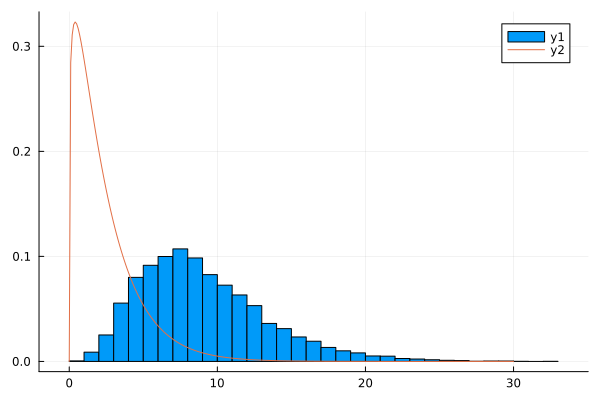

In [10]:
x_dist=0:.1:30
chi2 = di.Chisq(2.4)
di.pdf.(chi2,x_dist)
histogram(chi2_list, bin=50, normalize=true)
plot!(x_dist, di.pdf.(di.Chisq(2.4),x_dist))

### 2.6

Given the likelihood is:
$$P(\{y_{i}(x_{i})\}\mid \theta)\propto \exp\big(-\frac{\chi^2}{2}\big)$$

1. Run the following cell to create a function to calculate the likelihood (make sure you named the variables as asked in the previous questions)
2. Define m_range = 1:0.01:5
3. Define b_range = -7:0.01:3
4. Make a contour plot to visualize the distribution of the likelihood


In [11]:
m_range = 1:0.01:5
b_range = -7:0.01:3
chi2poly(b, m) = chisqr(b, m, x, y_observed, sigma)
p_chi2poly(b, m) = exp(-chi2poly(b, m)/2);

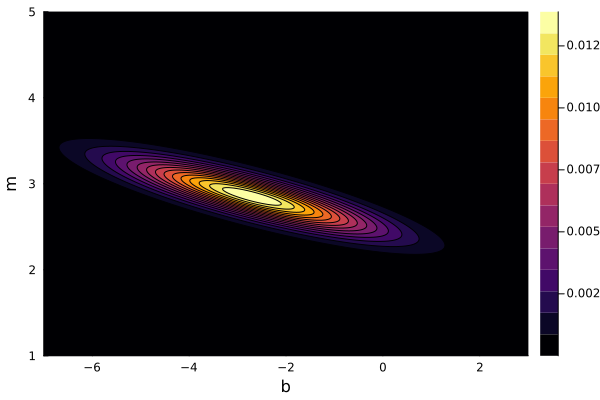

In [14]:
y_observed = y_true .+ noise;
contourf(b_range,m_range,p_chi2poly,xlabel="b",ylabel="m")

### 2.7

1. Redefine x = 0:0.5:5 and update y_observed. Plot the likelihood with the new x, y_observed and explain how the plot is different from 2.6
2. Redefine x = 0:2:20 and update y_observed. Plot the likelihood with the new x, y_observed and explain how the plot is different from 2.6

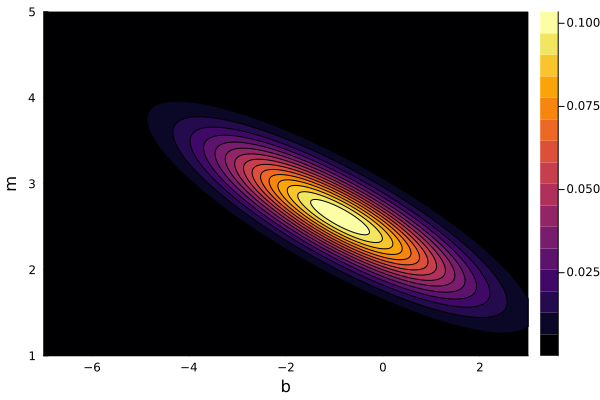

In [15]:
x=0:0.5:5
y_true = 3 .* x .- 2
sigma = 3
noise = Random.rand(di.Normal(0,sigma),length(x))
y_observed = y_true .+ noise;
contourf(b_range,m_range,p_chi2poly,xlabel="b",ylabel="m")

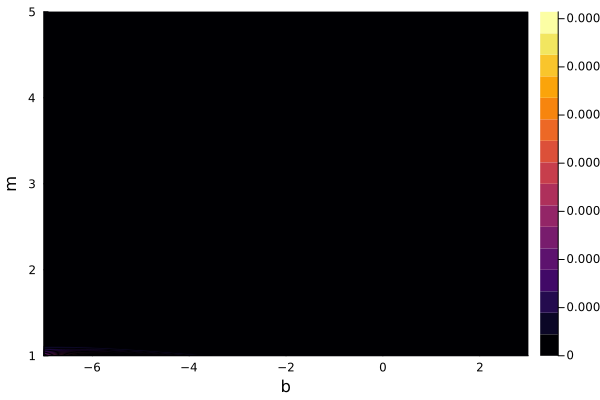

In [16]:
x=0:2:20
sigma = 3
noise = Random.rand(di.Normal(0,sigma),length(x))
y_observed = y_true .+ noise;
contourf(b_range,m_range,p_chi2poly,xlabel="b",ylabel="m")

2.7.1- The plot looks wider. There are more probabilities being covered in 2.7.1 compared to 2.6 plot center is also shifted to the right


2.7.2 The plot is nonexistent in 2.7.2 whereas you can see the plot in 2.6

### 2.8

Change x back to x = 0:1:10

1. Redefine sigma = 5 and update y_observed. Plot the likelihood with the new y_observed and explain how the plot is different from 2.6
2. Redefine sigma = 1 and update y_observed. Plot the likelihood with the new y_observed and explain how the plot is different from 2.6

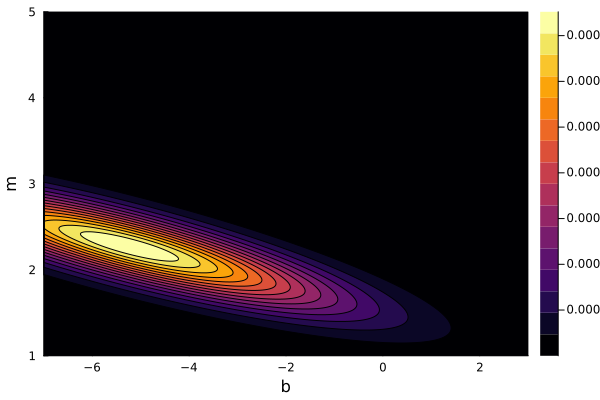

In [17]:
x=0:1:10
sigma = 5
noise = Random.rand(di.Normal(0,sigma),length(x))
y_observed = y_true .+ noise;
contourf(b_range,m_range,p_chi2poly,xlabel="b",ylabel="m")

For some reason the probabilities for 2.8 are all 0 while in 2.6 they were between .007 and .005. It also looks more shifted to the left and bigger compared to 2.6

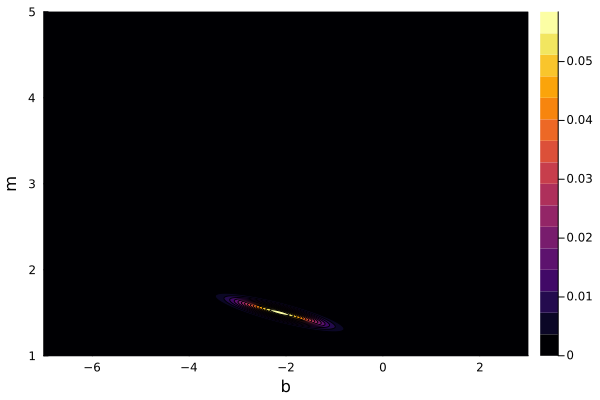

In [18]:
x=0:1:10
sigma = 1
noise = Random.rand(di.Normal(0,sigma),length(x))
y_observed = y_true .+ noise;
contourf(b_range,m_range,p_chi2poly,xlabel="b",ylabel="m")

The plot is really tiny here compared to 2.6 but it is located at higher probabilites at around .01 to .02 range compared to 2.6

plot b cener is -2